In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_validate
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Wine_red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


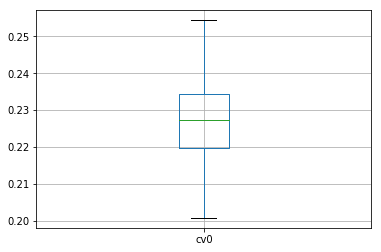

In [7]:
R2=[]
lr = LinearRegression()
for k in range(1000):
    (train,test) = train_test_split(df,train_size=0.8,test_size=0.2,random_state=None)
    features_train = train.alcohol
    targets_train = train.quality
    features_test = train.alcohol
    targets_test = train.quality
    lr.fit(features_train.values.reshape(-1,1),targets_train)
    R2_test = lr.score(features_test.values.reshape(-1,1),targets_test)
    R2.append(R2_test)
    
R_squared = pd.DataFrame()
R_squared['cv0'] = R2
R_squared.boxplot()

In [9]:
R_squared.head()

,cv0
0,0.243710
1,0.218365
2,0.226475
3,0.222088
4,0.232539


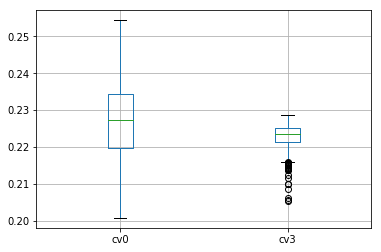

In [11]:
features = df.alcohol
targets = df.quality
lr = LinearRegression()

R2 = []
for k in range(1000):
    cv = KFold(n_splits=3, random_state=None, shuffle=True)
    results = cross_validate(lr, features.values.reshape(-1,1),targets, cv=cv)
    R2_test = results['test_score'].mean()
    R2.append(R2_test)
    
R_squared['cv3'] = R2
R_squared.boxplot()